<a href="https://colab.research.google.com/github/PHAB1/Jupyter-transcriptome-pipelines-plot/blob/main/R_GO_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Importação dos dados
#if (!require("BiocManager", quietly = TRUE))
#    install.packages("BiocManager")

#BiocManager::install("clusterProfiler")

# import package
library("ggplot2")
library("dplyr")
library(tidyverse)
library("readxl")
#library("clusterProfiler")

In [ ]:
#@title Enter descriptors
data <- data.frame("GOs" = rep(go, 2), 
                   "Condition" = rep(c("A", "B"), each = 5),
                   "GeneRatio" = 1 / sample(10, 10), 
                   "p.adjust" = 0.05 / sample(10, 10))

# Import data
dgse_R_ctrl_S_ctrl<-read.table("/content/gse_R_Ctrl_S_Ctrl.csv",sep=";",header = T)
dgse_R_Tripla_R_ctrl<-read.table("/content/gse_R_Tripla_R_Ctrl.csv",sep=";",header = T)
dgse_R_Tripla_S_ctrl<-read.table("/content/gse_R_Tripla_S_Ctrl.csv",sep=";",header = T)

descritores <- c("humoral immune response","cellular metabolic process","regulation of RNA biosynthetic process","cation binding","response to xenobiotic stimulus","activation of immune response","cellular oxidant detoxification","sequence-specific double-stranded DNA binding","metal ion binding","response to oxygen-containing compound","humoral immune response mediated by circulating immunoglobulin","cellular chemical homeostasis","regulation of DNA-templated transcription","cellular extravasation","response to metal ion","immune response-activating cell surface receptor signaling pathway","regulation of biosynthetic process","regulation of RNA metabolic process","cell adhesion","response to chemical","immunoglobulin mediated immune response","antioxidant activity","double-stranded DNA binding","negative regulation of cell migration","cellular response to inorganic substance","interleukin-1 beta production","transcription regulator activity","transmembrane transporter complex","positive regulation of defense response","DNA-binding transcription factor activity","negative regulation of cell death","nucleus,intrinsic apoptotic signaling pathway","regulation of transcription by RNA polymerase II","endocytosis") #@param {type:"string"}

# Add column condition for each
dgse_R_ctrl_S_ctrl$condition <- (rep("R_ctrl_S_ctrl",nrow(dgse_R_ctrl_S_ctrl)))
dgse_R_Tripla_S_ctrl$condition <- (rep("R_tripla_S_ctrl",nrow(dgse_R_Tripla_S_ctrl)))
dgse_R_Tripla_R_ctrl$condition <- (rep("R_tripla_R_ctrl",nrow(dgse_R_Tripla_R_ctrl)))


#View(data)
#print((rep("R_ctrl_S_ctrl",nrow(dgse_R_ctrl_S_ctrl))))
#View(data)
bindGse <- bind_rows(dgse_R_ctrl_S_ctrl, dgse_R_Tripla_S_ctrl, dgse_R_Tripla_R_ctrl) # Merge
bindGse <- filter(bindGse, Description %in% descritores) # Filter descritores
bindGse <- bindGse[,c(4,14,7,9)] # Select columns
colnames(bindGse) <- c("GOs","Condition","NES","FDR") # Change headers

# Correct columns
bindGse$NES <- as.numeric(sub(",", ".", bindGse$NES))
bindGse$FDR <- as.numeric(sub(",", ".", bindGse$FDR))


#GOs_description 
#bindGse[nrow(bindGse) + 1,] = c("t","R_ctrl_R_ctrl",1,1) # Add line for add group
head(bindGse)

,GOs,Condition,NES,FDR
,<chr>,<chr>,<dbl>,<dbl>
1,negative regulation of cell death,R_ctrl_S_ctrl,-1.940643,0.001221843
2,cellular response to inorganic substance,R_ctrl_S_ctrl,-1.736777,0.006268037
3,response to metal ion,R_ctrl_S_ctrl,-1.753422,0.007515252
4,response to xenobiotic stimulus,R_ctrl_S_ctrl,-1.746862,0.007639925
5,humoral immune response,R_ctrl_S_ctrl,1.656899,0.012948779
6,double-stranded DNA binding,R_ctrl_S_ctrl,-1.714505,0.013786951


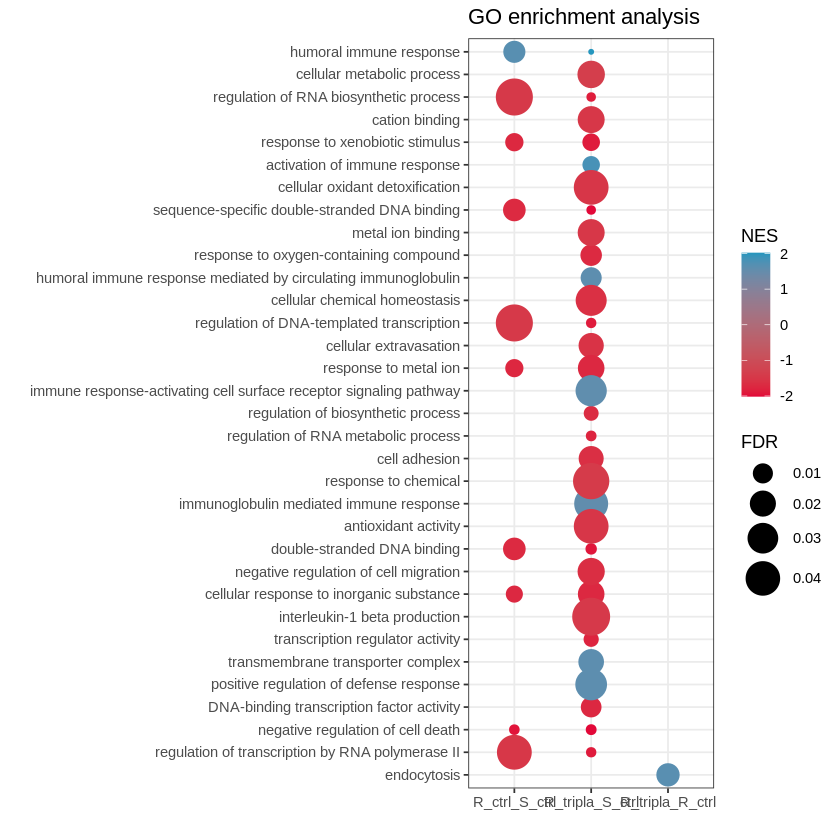

In [ ]:
#@title Enter color
# plot: dot plot
low = "#e20738" #@param {type:"string"}
high = "#2596be" #@param {type:"string"}
GO_plot <- ggplot(data = bindGse, aes(x = factor(Condition,level=c("R_ctrl_S_ctrl","R_tripla_S_ctrl","R_tripla_R_ctrl")), y = factor(GOs,level=rev(descritores)), 
                        color = NES, size = FDR)) + 
  geom_point() +
  scale_color_gradient(low = low, high = high) +
  theme_bw() + 
  ylab("") + 
  xlab("") + 
  ggtitle("GO enrichment analysis") + scale_size_continuous(range = c(1, 10))

GO_plot

In [ ]:
#@title Enter widhth and height of the figure
width=1000 #@param {type:"string"}
height=900 #@param {type:"string"}
font_size = 20 #@param {type:"string"}
file_name = "GO_plot_enrichment" #@param {type:"string"}
png(file=file_name, width=width, height=height)

GO_plot + theme_bw(base_size = font_size)
dev.off()

png 
  2